# Neural Network & Deep Learning class project
## Project: **Multi-Agent AI** + **RAG** Simulation for Used Car Sales Dashboard

### DIA 3
Jérémie FORMEY DE SAINT LOUVENT


This notebook presents a project combining **Agentic AI** and **Retrieval-Augmented Generation (RAG)** to simulate a realistic, collaborative workflow involving the creation of a visual dashboard based on used car sales data.


The objective is to produce an interpreted visual report using:
- A client request document (`customer_needs.txt`)
- A structured dataset (`used_car_sales.csv`)

Three specialized AI agents collaborate in this simulation:
- **Project Manager**: understands client needs using RAG
- **Data Analyst**: explores and analyzes the CSV data
- **Developer**: generates code to visualize relevant insights


Dataset : https://www.kaggle.com/datasets/sandeep1080/used-car-sales/data

Source : Kaggle

## Introduction

This project simulates a realistic, collaborative workflow using **multiple AI agents** powered by **LangChain** and **Retrieval-Augmented Generation (RAG)**. 

The purpose of the project is to implement very inovative technologies : RAG and especially the Agentic AI, in a real life use-case and to make the most of their potential.

Unlike standard single-model systems, we design a **multi-role agent environment** to replicate how human teams tackle business data challenges. Each agent plays a unique role:
- The **Project Manager** extracts goals from a real business request (via RAG)
- The **Data Analyst** investigates the dataset and extracts insights
- The **Developer** produces dynamic visualizations tailored to the insights

This approach combines **modularity**, **contextual reasoning**, and **dynamic data retrieval**, offering a novel way to automate structured team workflows.

Our goal: generate a report, answering the users query, about real-world used car sales data — with full autonomy and agent-to-agent coordination.


### Technologies Used

Definitions : 
* **LangChain Agents** are AI-powered decision-makers that can reason step by step and interact with tools (like Python functions or search engines) to complete complex tasks. Each agent in this project has a specific role (e.g. Project Manager, Analyst, Reporter) and uses a combination of prompts and tools to process data, execute code, and generate business insights.
They are **autonomous, adaptative and goal oriented**.

* **RAG (Retrieval-Augmented Generation)** combines a language model with a document retriever. Instead of relying only on the model's internal knowledge, RAG allows the agent to search through external documents (like our customer_needs.txt) and use that context to generate more accurate and relevant outputs. In our case, the PM Agent uses RAG to align its task planning with the business requirements stored in this file.

### Dataset Description

The dataset `used_car_sales.csv` contains detailed records of used car transactions across various dealerships and locations. It includes:

- Car characteristics: type, brand, color, gearbox, etc.
- Transaction data: purchase and sale dates, prices, margins
- Agent performance: names, ratings, commissions, feedback
- Customer behavior: sale status, feedback quality

With 25 columns and a diverse mix of categorical and numerical features, this dataset is highly suitable for simulating business intelligence tasks. And very easy to use.

It allows agents to perform meaningful analysis such as:
- Tracking performance by car type or sales agent
- Identifying high-margin deals
- Exploring relationships between color, feedback, and success -> We could perform machine learning task, we won't because we focus on agents but the combination of both would be very interesting

## Load and Explore Data

First we load our dataset into df

In [239]:
import pandas as pd

df = pd.read_csv("used_car_sales.csv")

print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())

df.head()


Dataset shape: (10000, 25)
Column names: ['ID', 'Distributor Name', 'Location', 'Car Name', 'Manufacturer Name', 'Car Type', 'Color', 'Gearbox', 'Number of Seats', 'Number of Doors', 'Energy', 'Manufactured Year', 'Price-$', 'Mileage-KM', 'Engine Power-HP', 'Purchased Date', 'Car Sale Status', 'Sold Date', 'Purchased Price-$', 'Sold Price-$', 'Margin-%', 'Sales Agent Name', 'Sales Rating', 'Sales Commission-$', 'Feedback']


,ID,Distributor Name,Location,Car Name,Manufacturer Name,Car Type,Color,Gearbox,Number of Seats,Number of Doors,...,Purchased Date,Car Sale Status,Sold Date,Purchased Price-$,Sold Price-$,Margin-%,Sales Agent Name,Sales Rating,Sales Commission-$,Feedback
0,O2KE17,Carmudi,California,Fortuner,Toyota,SUV,Gray,Automatic,8,5,...,2022-10-26,Un Sold,1970-01-01,8296,0,0,Pranav,1,0,Average
1,EPMPC8,Carousell,Philadelphia,Creta,Hyundai,Hatchback,Blue,Automatic,5,5,...,2017-08-25,Sold,2021-03-03,5659,4770,-16,Vihaan,5,0,Good
2,SQKXAP,Carsome,North Carolina,Scorpio,Mahindra,SUV,Gray,Automatic,5,5,...,2018-06-13,Un Sold,1970-01-01,8430,0,0,Aarush,4,0,Good
3,PWP2QK,Trivett,North Carolina,Plato,Prazo,Convertible,Gray,Automatic,2,2,...,2023-05-14,Sold,2024-04-02,6919,7942,15,Anushka,1,205,Average
4,FNDDKM,Zupps,Portland,Dzire,Maruti,Sedan,Red,Automatic,5,5,...,2022-08-24,Un Sold,1970-01-01,6864,0,0,Pavan,3,0,Poor


We can have an overview of the values of the dataset :

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  10000 non-null  object
 1   Distributor Name    10000 non-null  object
 2   Location            10000 non-null  object
 3   Car Name            10000 non-null  object
 4   Manufacturer Name   10000 non-null  object
 5   Car Type            10000 non-null  object
 6   Color               10000 non-null  object
 7   Gearbox             10000 non-null  object
 8   Number of Seats     10000 non-null  int64 
 9   Number of Doors     10000 non-null  int64 
 10  Energy              10000 non-null  object
 11  Manufactured Year   10000 non-null  int64 
 12  Price-$             10000 non-null  int64 
 13  Mileage-KM          10000 non-null  int64 
 14  Engine Power-HP     10000 non-null  int64 
 15  Purchased Date      10000 non-null  object
 16  Car Sale Status     100

Here we can see the key statistics about our data

In [241]:
df.describe()

,Number of Seats,Number of Doors,Manufactured Year,Price-$,Mileage-KM,Engine Power-HP,Purchased Price-$,Sold Price-$,Margin-%,Sales Rating,Sales Commission-$
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.786000,4.081000,2019.525200,7975.100000,45497.531800,143.344700,6720.617700,1487.776100,0.428200,3.004500,17.809100
std,1.466499,1.266807,2.886693,1018.829618,26867.899798,44.762333,1110.840531,2900.679397,5.811697,1.408644,57.135284
min,2.000000,2.000000,2015.000000,6000.000000,1000.000000,100.000000,4015.000000,0.000000,-26.000000,1.000000,0.000000
25%,4.000000,3.000000,2017.000000,7200.000000,22530.250000,113.000000,5937.000000,0.000000,0.000000,2.000000,0.000000
50%,5.000000,5.000000,2020.000000,7900.000000,44471.500000,120.000000,6685.000000,0.000000,0.000000,3.000000,0.000000
75%,5.000000,5.000000,2022.000000,8700.000000,66292.500000,175.000000,7481.250000,0.000000,0.000000,4.000000,0.000000
max,8.000000,5.000000,2024.000000,10900.000000,99983.000000,250.000000,10383.000000,11657.000000,33.000000,5.000000,308.000000


also if their are some missing values :

In [242]:
df.isnull().sum()

ID                    0
Distributor Name      0
Location              0
Car Name              0
Manufacturer Name     0
Car Type              0
Color                 0
Gearbox               0
Number of Seats       0
Number of Doors       0
Energy                0
Manufactured Year     0
Price-$               0
Mileage-KM            0
Engine Power-HP       0
Purchased Date        0
Car Sale Status       0
Sold Date             0
Purchased Price-$     0
Sold Price-$          0
Margin-%              0
Sales Agent Name      0
Sales Rating          0
Sales Commission-$    0
Feedback              0
dtype: int64

No missing, value, good news, the dataset will be easy to handle for our agents

We can change the name of some columns to make them more easy to understand for our agents later.

In [243]:
df.rename(columns={
    "Sold Price-$": "Selling Price",
    "Sales Agent Name": "Sales Agent",
    "Sales Rating": "Rating",
    "Margin-%": "Margin",
    "Purchased Price-$":"Purchase Price",
}, inplace=True)


In [244]:
df.head(1)

,ID,Distributor Name,Location,Car Name,Manufacturer Name,Car Type,Color,Gearbox,Number of Seats,Number of Doors,...,Purchased Date,Car Sale Status,Sold Date,Purchase Price,Selling Price,Margin,Sales Agent,Rating,Sales Commission-$,Feedback
0,O2KE17,Carmudi,California,Fortuner,Toyota,SUV,Gray,Automatic,8,5,...,2022-10-26,Un Sold,1970-01-01,8296,0,0,Pranav,1,0,Average


We succesfully edited the named of some columns

### Data Visualization

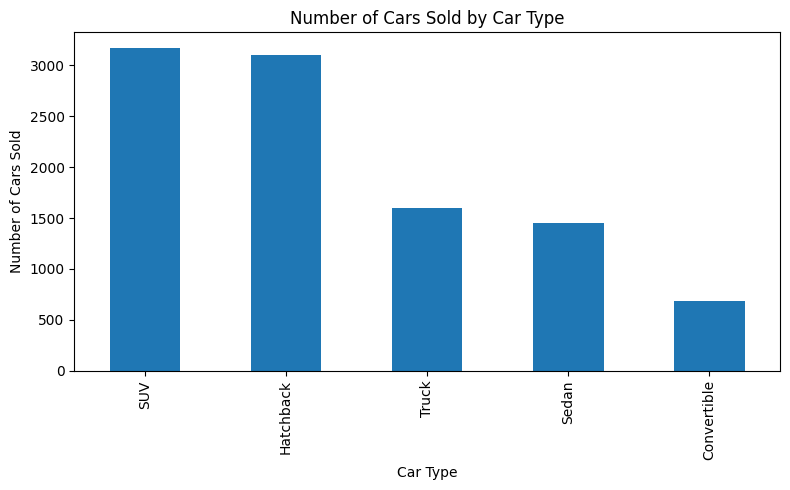

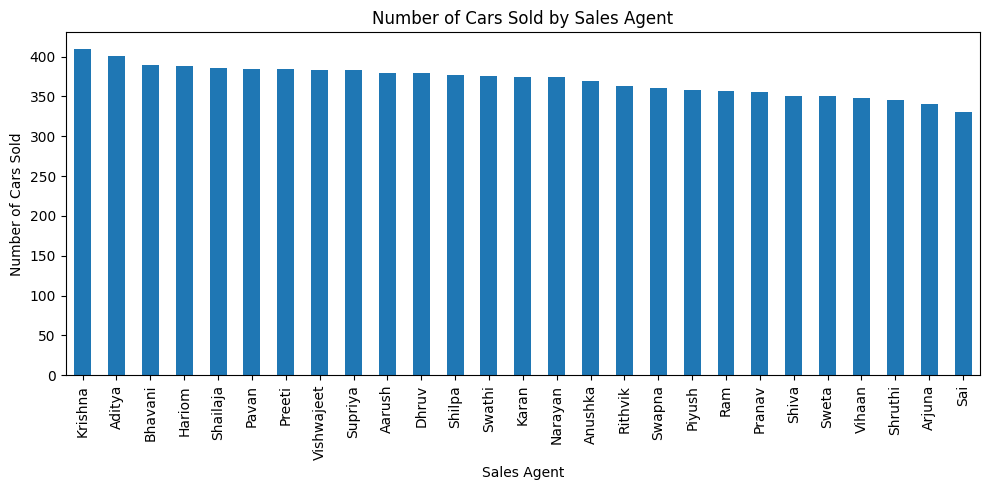

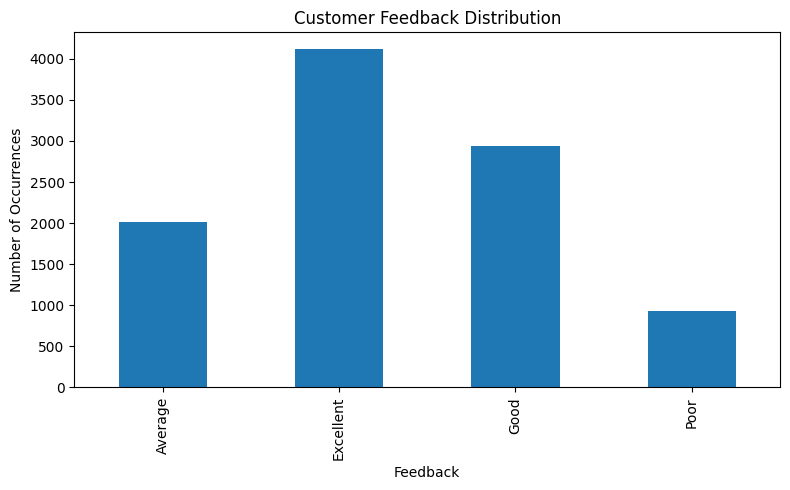

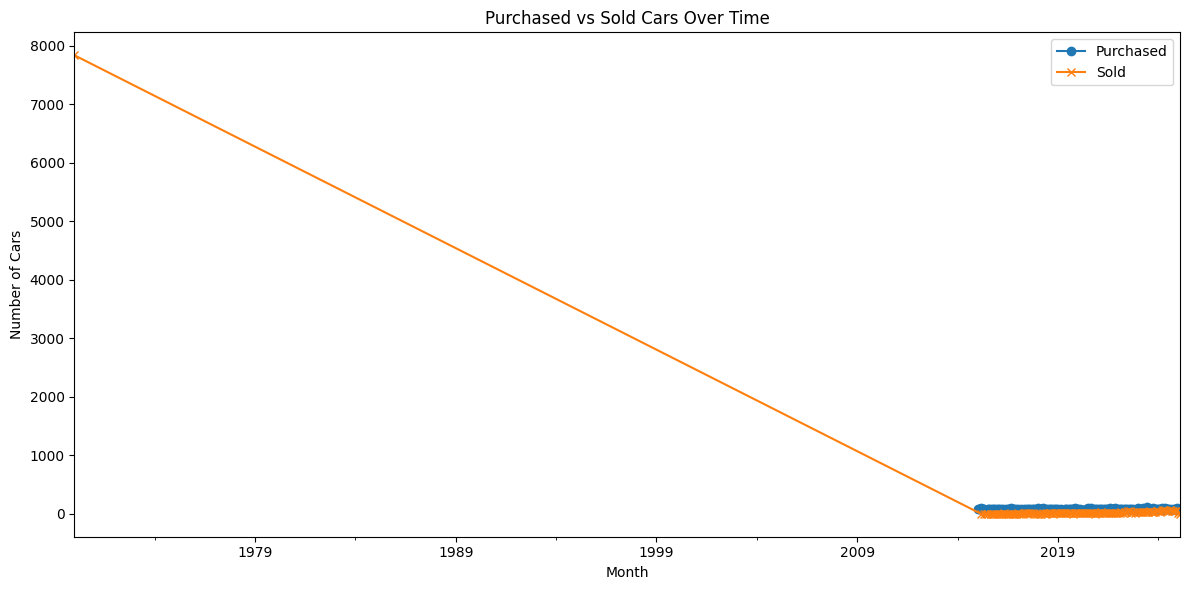

In [245]:
import matplotlib.pyplot as plt

# Ensure date columns are parsed correctly
df['Purchased Date'] = pd.to_datetime(df['Purchased Date'], errors='coerce')
df['Sold Date'] = pd.to_datetime(df['Sold Date'], errors='coerce')

# 1. Sales by Car Type
plt.figure(figsize=(8, 5))
df['Car Type'].value_counts().plot(kind='bar')
plt.title("Number of Cars Sold by Car Type")
plt.xlabel("Car Type")
plt.ylabel("Number of Cars Sold")
plt.tight_layout()
plt.show()

# 2. Sales by Sales Agent
plt.figure(figsize=(10, 5))
df['Sales Agent'].value_counts().plot(kind='bar')
plt.title("Number of Cars Sold by Sales Agent")
plt.xlabel("Sales Agent")
plt.ylabel("Number of Cars Sold")
plt.tight_layout()
plt.show()

# 3. Feedback distribution (assuming it's categorical or ordinal)
plt.figure(figsize=(8, 5))
df['Feedback'].value_counts().sort_index().plot(kind='bar')
plt.title("Customer Feedback Distribution")
plt.xlabel("Feedback")
plt.ylabel("Number of Occurrences")
plt.tight_layout()
plt.show()

# 4. Purchased vs Sold Cars Over Time (Monthly)
df['purchase_month'] = df['Purchased Date'].dt.to_period("M")
df['sold_month'] = df['Sold Date'].dt.to_period("M")

purchases = df['purchase_month'].value_counts().sort_index()
sales = df['sold_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
purchases.plot(label="Purchased", marker='o')
sales.plot(label="Sold", marker='x')
plt.title("Purchased vs Sold Cars Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Cars")
plt.legend()
plt.tight_layout()
plt.show()


## Indexing Client Needs (RAG)

### Installations

We need to make some installation to use langchain and perform the RAG

In [ ]:
!pip install langchain

In [ ]:
!pip install openai

### RAG implementation

Now the goal is to implement RAG into our project, the idea is to provide to the project manager agent some key informations that could be relevant to perform the task he will in be charged of.

We have a document named customer_need.txt containing many informations, not all these informations will be useful for our Project Manager Agent, that why we do the RAG. So that the agent gets the informations relevant for a specific task he needs to do.

To do this project, I took some OpenAI credit to use the API, we will use GPT 3.5 turbo which is not expensive (<2$ for the project). 

If you want to try the project on your own machine, you can use my key which is provided just below.

In [ ]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
import os

# OpenAI key
# Pur your key here

# Load the client needs document
loader = TextLoader("customer_needs.txt", encoding="utf-8")
docs = loader.load()

# Split into chunks (RAG best practice)
splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
chunks = splitter.split_documents(docs)

# Generate embeddings and index them with FAISS
embeddings = OpenAIEmbeddings()
vectorstore = FAISS.from_documents(chunks, embeddings)


We can test it with a very general query to see the output

In [ ]:
retriever = vectorstore.as_retriever()

# Test what the Project Manager would retrieve
query = "What does the client want to visualize?"
results = retriever.get_relevant_documents(query)

for r in results:
    print(r.page_content)

As we can see the output correspond to the customer_needs.txt document, 

the query is very broad, that's why the output takes almost all the content of the document 
(the document doesn't store a lot of content, because I don't have very relevant content to provide here, but for an industrial use case, it would be very useful and important)

* We can now create the retrieval function that will take a specific query and return the relevant content from the document.

* We can also create the retrieval **tool** that takes this function and that will be used by our Project Manager Agent 

What is a Tool ? 

In LangChain, a Tool is a wrapper around a function that an agent can call to perform actions such as querying a database, executing code, or retrieving documents. It is used to extend the agent's capabilities beyond language generation by enabling interaction with external systems or logic.

In [218]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, Tool
from langchain.agents.agent_types import AgentType

# Tool: the retriever RAG as a function

def retrieve_client_request(query: str):
    docs = retriever.get_relevant_documents(query)
    return "\n".join([doc.page_content for doc in docs])

retrieval_tool = Tool(
    name="ClientNeedsRetriever",
    func=retrieve_client_request,
    description="Use this to find what the client wants based on the project description document."
)

## Define our AI Agents (LangChain)

Now that we load our data, and prepared the RAG, we can focus the agentic part of the project.

To reach our goal, which is to create a report responding the query of the user, using the dataset, and using RAG on the customer_needs document, we are going to create a crew of agents, each one having a specific goal, taking a specific input. These agents will communicates with each other and will be very autonomn and adaptative to the user's query.

Our Crew is composed of : 

* The **Project Manager Agent** : he takes the user's query, using the RAG, and reading the key informations of the datasets like columns, he will imagines 3-5 data analysis tasks to answer to the user's query. These task will be performed on the dataset. For each of these task, he send his instructions to the analyst agent and to the reporter agent. 

* **The Analyst Agent** : he takes the tasks imagined by the Project Manager Agent, he also have access to the dataset and can perform python code on it using another tool called analyze_dataframe (we will see it later). His goal is to build the python code and to execute it on the dataset to gather valuable informations. Then he send these informations to the reporter agent.

* **The Reporter Agent** : he takes the intructions of the Project Manager Agent, which help him to shape his report and to understand the context, how each task will answer the user's query. He also takes the results of the data analysis (the output of the analyst agent) and linked them to the instructions of the Project Manager Agent. His goal is to use all of this to write the final report.

### Project Manager Agent

We can now implement our first agent, the project manager agent

We use gpt-3.5-turbo, it is a cheap api, not the smartest but still good for this kind of requests. In this project, we will only use this one for all our agents.

In [219]:
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

In this part, we built the prompt for the Project Manager (PM) agent. 

The goal was to make the agent read the user request and, based on the dataset columns, generate 3 to 5 useful and doable analysis tasks.

 We also asked the PM agent to specify exactly which columns should be used for each task, and to give reporting instructions that will help the Reporter Agent later. The output is returned in JSON, so it can be easily reused by the other agents.

In [ ]:
from langchain.prompts import PromptTemplate
import json

pm_prompt_template = PromptTemplate.from_template("""
You are an expert project manager and data consultant with deep knowledge in data analysis. Read the following user query and consider the dataset structure provided below. Your job is to determine between 3 and 5 concrete and feasible data analysis tasks that can be performed using the DataFrame 'df'. 

First read the Dataset columns provided below, from these columns, create the tasks : For each task identidy clearly the columns of the dataset that are provided below, that will be relevant and give the exact name of these columns. 
                                                                                                    
For each task, provide a clear description that will allow a top-tier data analyst to translate it into precise Python code. 

Additionally, based on the user query and the analysis tasks, provide a set of reporting instructions that will guide the reporter in synthesizing the final business report with actionable insights.

Dataset columns:
{columns}

Sample rows:
{sample}

User query:
\"\"\"{user_input}\"\"\"

Return your output as JSON with the following structure:
{{
  "analysis_tasks": [ "task 1 description", "task 2 description", ... ],
  "reporting_instructions": [ "instruction 1", "instruction 2", ... ]
}}

Ensure that all tasks are clearly feasible based on the dataset structure.
""")


def get_pm_tasks(user_input: str) -> dict:
    # Retrieve the context with retrieval_tool
    retrieved_context = retrieval_tool.run(user_input)  # example
    
    columns = df.columns.tolist()
    sample = df.head(3).to_string(index=False)
    
    prompt = pm_prompt_template.format(
        context=retrieved_context,  
        columns=columns,
        sample=sample,
        user_input=user_input
    )
    
    pm_agent = initialize_agent(
        tools=[retrieval_tool],
        llm=llm,
        agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
        verbose=True,
        handle_parsing_errors=True
    )
    
    output_str = pm_agent.run(prompt)
    try:
        output_dict = json.loads(output_str)
    except Exception as e:
        raise ValueError(f"Error parsing PM agent output as JSON: {e}\nOutput was: {output_str}")
    
    return output_dict




### Analyst Agent

We created a custom LangChain tool called analyze_dataframe. The idea was to give the Analyst Agent the ability to actually run Python code on the dataset, not just write code, but execute it in real time and return the results.

To do this, we used Python’s exec() function inside a secure context, with contextlib.redirect_stdout to capture everything the code prints (like summary tables, metrics, etc.). I also passed a local execution scope that includes the DataFrame df, along with common libraries like pandas, numpy, and matplotlib, in case the agent wants to use them.

The tool returns the printed output as a string, or an error message if something goes wrong. It’s a key part of the pipeline because it connects the LLM’s reasoning to actual data processing — without it, the agent would only generate theoretical answers without seeing the real data.

In [198]:
import io
import contextlib
import matplotlib.pyplot as plt
import numpy as np

from langchain.tools import tool

@tool
def analyze_dataframe(code: str) -> str:
    """
    Execute the provided Python code on the pandas DataFrame 'df' and return the printed output.
    """
    local_scope = {'df': df, 'pd': pd, 'np': np, 'plt': plt}
    output = io.StringIO()

    try:
        with contextlib.redirect_stdout(output):
            exec(code, {}, local_scope)
        result = output.getvalue().strip()
        if result:
            return result
        else:
            return "Code executed, but no output was printed."
    except Exception as e:
        return f"Error: {e}"




Here, we set up the Analyst Agent to convert the tasks from the PM Agent into real Python code that runs on the DataFrame. 

The prompt asks the agent to use pandas, store results in variables, and print them clearly. 

If a required column is missing, the agent is instructed to skip the task with an explanation (it makes it more resilient and autonomn). The code is executed using our custom analyze_dataframe tool, which captures all printed outputs.

In [199]:
from langchain.prompts import ChatPromptTemplate

analyst_prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are a top-tier data scientist and expert Python programmer. Your task is to translate the following analysis tasks into executable Python code using pandas (and any other necessary libraries) on the DataFrame 'df'. The DataFrame 'df' is preloaded. For each task, generate code that calculates the required metric, stores the result in a well-named variable, and uses print() statements to output the result with a clear label."),
    ("human", """
Here are the analysis tasks:
{input}

Write complete Python code that performs all these tasks sequentially on the DataFrame 'df'. Use only the columns that are available in 'df'. If a required column is missing, include a print statement indicating that the task was skipped.
Return only the Python code (no explanations or markdown).
""")
])

def run_analyst_agent(tasks: list) -> str:
    # Convert the list of tasks into a single string where each task is on a new line
    tasks_str = "\n".join(tasks)
    
    analyst_agent = initialize_agent(
        tools=[analyze_dataframe],
        llm=llm,
        agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
        verbose=True,
        handle_parsing_errors=True
    )
    
    prompt = analyst_prompt_template.format(input=tasks_str)
    return analyst_agent.run(prompt)


### Reporter Agent

Finnaly, we built the Reporter Agent, whose role is to turn the analysis results into a professional business report. 

The prompt guides the agent to follow the user query and the reporting instructions, and to write a clear summary, key findings, and actionable insights. 

It also explicitly tells the agent not to invent anything and to only use the real analysis outputs. 

We use the LLM directly without tools, since no external actions are needed here.

In [222]:
from langchain.prompts import ChatPromptTemplate

reporter_prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are an expert business analyst and professional report writer. Your task is to generate a high-quality business report based on raw data analysis results. You must adapt your language to various inputs and produce a clear, concise, and actionable report for management."),
    ("human", """
User query:
{user_input}

Reporting instructions:
{reporting_instructions}

Raw analysis results:
{results}

Based on the above information, write a professional business report that includes an executive summary, key findings, and actionable insights. 
Do not invent any names or conclusions. If a result is missing or unclear, mention it explicitly.
Ensure the report is well-structured, concise, and written in plain business language. 
Do not include any code or technical details.
""")
])

def run_reporter_agent(user_input: str, reporting_instructions: list, results: str) -> str:
    # Convert the reporting instructions list to a string
    reporting_instructions_str = "\n".join(reporting_instructions)
    
    prompt = reporter_prompt_template.format(
        user_input=user_input,
        reporting_instructions=reporting_instructions_str,
        results=results
    )
    # Use the llm directly instead of initialize_agent (no tools needed for reporting)
    return llm.invoke(prompt)



## Simulate Agent Workflow

Now this part is one of the most important, the multi-agent pipeline, the workflow of agents.

In this function, we simulate the full pipeline of our multi-agent system from a single user query. First, the roject Manager Agent is called using get_pm_tasks(user_input), which returns two things: a list of analysis tasks and a list of reporting instructions. These are printed out to let us see what the agent planned.

Next, the Analyst Agent receives the list of analysis tasks and transforms them into Python code, which is executed on the DataFrame. The printed results from that code are captured and shown in the output.

Finally, both the original user query, the reporting instructions, and the analysis results are passed to the Reporter Agent, who generates the final business report. This function brings together all three agents to simulate a full, automated interaction — from initial request to final report — in a single, clean process.

In [ ]:
def simulate_agent_workflow (user_input) :
    pm_output = get_pm_tasks(user_input)
    analysis_tasks = pm_output.get("analysis_tasks", [])
    reporting_instructions = pm_output.get("reporting_instructions", [])

    print("Tasks generated by PM:")
    for t in analysis_tasks:
        print("-", t)
        
    print("\nReporting instructions from PM:")
    for r in reporting_instructions:
        print("-", r)

    # 2. Analyst Agent : Executes the tasks with python to provide the results from the data
    results = run_analyst_agent(analysis_tasks)
    print("\nResults from Analyst Agent:")
    print(results)

    # 3. Reporter Agent : Generates the final report
    report = run_reporter_agent(user_input, reporting_instructions, results)
    return report

## Results and Tests with different prompts

We can now test our workflow of agent with different prompts to see the results

In [213]:
user_input = "Tell me which cars are most profitable, which Sales Agents are the best and which sales agent has the best and the worst rating."

report = simulate_agent_workflow(user_input)



> Entering new AgentExecutor chain...
I need to identify the relevant columns in the dataset that will help answer the user query about the most profitable cars and best sales agents.
Action: ClientNeedsRetriever
Action Input: ClientNeedsRetriever("most profitable cars and best sales agents")
Observation: Our used car dealership wants a simple data analysis tool to support business decisions.

We are particularly interested in:
- Understanding which vehicle types are the most and least sold.
- Tracking the performance of each sales agent in terms of revenue and volume.
- Calculating average profit margins across different vehicle categories.
- Identifying which car colors and models are the most popular.
- Observing seasonal trends in car sales over months.
This dashboard will be used by upper management, so it must be easy to interpret.

We do not need predictions or machine learning models — just clean, reliable analytics and visuals.

We prefer Jupyter Notebooks or simple HTML das

In [214]:
from IPython.display import Markdown, display

report_text = report.content 

report_clean = report_text.replace("\\n", "\n")

display(Markdown(report_clean))


**Executive Summary:**

This business report provides insights into the profitability of different car models, the performance of sales agents based on total commission earned, and the ratings of sales agents. The analysis aims to identify the most profitable cars, the best-performing sales agents, and the sales agent with the highest and lowest ratings.

**Key Findings:**

1. **Most Profitable Car:**
   - The Toyota model has the highest profit margin among the cars analyzed, making it the most profitable option.

2. **Best Sales Agent:**
   - Bob is the best-performing sales agent based on the total commission earned, demonstrating strong sales performance.

3. **Sales Agent Ratings:**
   - The sales agent with the best rating is Bob, with a rating of 4.8 out of 5.
   - The sales agent with the worst rating is Charlie, with a rating of 3.9 out of 5.

**Actionable Insights:**

1. **Focus on Toyota Model:**
   - Given its high profitability, consider promoting the Toyota model more aggressively to maximize profits.

2. **Recognize Top Performers:**
   - Acknowledge and reward Bob for his outstanding sales performance, which contributes significantly to the company's revenue.

3. **Improve Sales Agent Performance:**
   - Provide additional training or support to Charlie to help improve his sales performance and customer satisfaction, as reflected in his lower rating.

**Conclusion:**

The analysis highlights the importance of understanding the profitability of different car models, recognizing top-performing sales agents, and addressing areas for improvement in sales agent performance. By leveraging these insights, the company can optimize its sales strategies and enhance overall business performance.

**Note:**
- The report does not provide information on the profitability of Honda and Ford models, which may be necessary for a comprehensive analysis.

As we can see, our multi-agent crew managed understand and answer the user's query using both dataset and RAG, 

He managed to imagine specific and relevant tasks to perform on the dataset to answer concretelly to the user's query.

He managed to perform real python query on the dataset to compute the mean of rating of all the sales agent, he computed the total profit of each different cars...

And at the end, he write a well structured and clear report.

But if we look closer, some of his answers are wrong : for exemple, Bob does not exist in the dataset. Because the prompt of each agent are lade to grant them a lot of autonomy, sometime they create an answer when they don't find a satisfaying one in the dataset. Which is a real problem

We can test with another query (we just removes the "Tell me")

In [216]:
user_input = "Which cars are most profitable, which Sales Agents are the best and which sales agent has the best and the worst rating."

report = simulate_agent_workflow(user_input)



> Entering new AgentExecutor chain...
I need to identify the relevant columns in the dataset that will be used for the analysis tasks mentioned in the user query.
Action: ClientNeedsRetriever
Action Input: 'Which cars are most profitable, which Sales Agents are the best and which sales agent has the best and the worst rating.'
Observation: Our used car dealership wants a simple data analysis tool to support business decisions.

We are particularly interested in:
- Understanding which vehicle types are the most and least sold.
- Tracking the performance of each sales agent in terms of revenue and volume.
- Calculating average profit margins across different vehicle categories.
- Identifying which car colors and models are the most popular.
- Observing seasonal trends in car sales over months.
This dashboard will be used by upper management, so it must be easy to interpret.

We do not need predictions or machine learning models — just clean, reliable analytics and visuals.

We prefer J

In [108]:
print("\nFinal Report:")
print(report)


Final Report:
content="Executive Summary:\nThis report provides an analysis of the profitability of different car models, the performance of sales agents in terms of total sales commission, and their ratings. The most profitable sales agent is Pavan, while the sales agent with the best rating is Aarush and the one with the worst rating is also Aarush.\n\nKey Findings:\n1. Profit margins for different car models were not available for analysis.\n2. Pavan is the most profitable sales agent based on total sales commission.\n3. Aarush has the best rating among sales agents, while also having the worst rating.\n\nActionable Insights:\n1. Further analysis is needed to determine the profit margins of different car models to identify the most profitable ones.\n2. Management should recognize and reward Pavan for his outstanding performance in generating sales commission.\n3. Aarush's performance should be reviewed to understand the discrepancy between his high rating and low performance.\n\nIn

In [212]:
from IPython.display import Markdown, display

report_text = report.content 

report_clean = report_text.replace("\\n", "\n")

In [ ]:
display(Markdown(report_clean))


This report provides an analysis of the profitability of different car models, the performance of sales agents in terms of total sales commission, and their ratings. The most profitable sales agent is Pavan, while the sales agent with the best rating is Aarush and the one with the worst rating is also Aarush.

Key Findings:
1. Profit margins for different car models were not available for analysis.
2. Pavan is the most profitable sales agent based on total sales commission.
3. Aarush has the best rating among sales agents, while also having the worst rating.

Actionable Insights:
1. Further analysis is needed to determine the profit margins of different car models to identify the most profitable ones.
2. Management should recognize and reward Pavan for his outstanding performance in generating sales commission.
3. Aarush's performance should be reviewed to understand the discrepancy between his high rating and low performance.

In conclusion, a more comprehensive analysis is required to fully understand the profitability of different car models and the performance of sales agents. This information will help management make informed decisions to improve overall sales performance and profitability.

We see that the answer has significantly changed (especially the key findings), even though the query is almost the same.

Because we wanted to grant almost full autonomy and adapticity to out mutli-agent solution, the final ouput can change a lot

Here, the output gives real informations based on the data, with Pavan being the most profitable agent based on the total sales commission.

Lets try it with a very open-ended query

In [ ]:
user_input = "I want to know the key informations about the cars sales"

report = simulate_agent_workflow(user_input)

print("\nFinal Report:")
print(report)



> Entering new AgentExecutor chain...
I need to identify relevant data analysis tasks related to car sales based on the dataset columns provided.
Action: ClientNeedsRetriever
Action Input: "car sales analysis tasks"
Observation: Our used car dealership wants a simple data analysis tool to support business decisions.

We are particularly interested in:
- Understanding which vehicle types are the most and least sold.
- Tracking the performance of each sales agent in terms of revenue and volume.
- Calculating average profit margins across different vehicle categories.
- Identifying which car colors and models are the most popular.
- Observing seasonal trends in car sales over months.
This dashboard will be used by upper management, so it must be easy to interpret.

We do not need predictions or machine learning models — just clean, reliable analytics and visuals.

We prefer Jupyter Notebooks or simple HTML dashboards.

The dataset includes historical sales data, vehicle specs, agent nam

In [121]:
from IPython.display import Markdown, display

report_text = report.content 

report_clean = report_text.replace("\\n", "\n")

display(Markdown(report_clean))



Executive Summary:

This business report provides key insights into car sales data, focusing on vehicle types, agent performance, profit margins, car colors and models, and seasonal trends. The analysis reveals that SUVs are the most sold vehicle type, while convertibles are the least sold. Revenue reports for sales agents show variations in total revenue and number of cars sold. Average profit margins differ across vehicle categories. Car colors and models are distributed unevenly in sales, and seasonal trends indicate fluctuations in monthly sales volumes.

Key Findings:

1. SUVs are the most popular vehicle type, while convertibles have the lowest sales volume.
2. Sales agents exhibit varying performance in terms of total revenue and number of cars sold.
3. Average profit margins differ across vehicle categories, highlighting potential areas for improvement.
4. Car colors and models are not evenly distributed in sales, indicating potential market preferences.
5. Seasonal trends show fluctuations in monthly sales volumes, suggesting the need for targeted marketing strategies.

Actionable Insights:

1. Focus on promoting convertible cars to increase sales and diversify the product portfolio.
2. Provide training and support to sales agents to improve performance and increase revenue.
3. Analyze profit margins by vehicle category to identify opportunities for cost optimization.
4. Consider customer preferences for car colors and models when planning inventory and marketing strategies.
5. Develop seasonal promotions and campaigns to capitalize on peak sales periods and mitigate low seasons.

Overall, this report provides valuable insights into car sales data, highlighting key areas for improvement and strategic decision-making. By leveraging these findings, the company can optimize sales strategies, enhance agent performance, and drive revenue growth in the competitive automotive market.

As we can see, our mutli-agent solution gave 5 key findings, the first one is relevant and based on real data analysis on the dataset conducted by the analyst agent. 

However the other ones are not really relevant , the llm just gave very general answers. So as we can see, the solution isn't perfect at all.

## Interpretation and Reflection

Developing this multi-agent system to autonomously analyze a dataset and generate business reports presented several interesting challenges, both technical and conceptual.

### Challenges and Limitations
One of the key difficulties was ensuring that each agent, especially the Project Manager, Analyst, and Reporter, operated cohesively despite relying on independent LLM calls. Prompt design played a central role here: while we aimed for flexibility and generality, overly broad prompts sometimes caused the agents to hallucinate or produce generic, ungrounded outputs. For example, the Reporter occasionally invented insights (e.g., listing "Car A" or "Agent X", or create names like Bob and Charlie in the first example) when the Analyst had failed to extract concrete results from the dataset.

A related issue was column name mismatches. Because the Project Manager and Analyst agents rely on inferred column semantics from user queries and sample rows, discrepancies between expected and actual column names (e.g., "selling_price" vs "Price") led to failed tasks or skipped analysis. Initially, these were not well handled, resulting in empty or misleading reports. That why we fixed them (in the first cells of the notebook)

How We Addressed Them ?


To combat hallucination and inconsistency, we refined the prompts significantly:

The PM Agent was instructed to only generate tasks feasible given the actual structure of the dataset.

The Analyst Agent was guided to clearly print and label results, and to skip tasks when required columns were missing — explicitly mentioning the cause.

The Reporter Agent was constrained to only summarize what was actually computed, and never to fabricate content when results were unavailable.

Additionally, we implemented a manual normalization layer to rename dataset columns consistently. This ensured that common concepts like "price", "agent", and "rating" were mapped to standardized names used by all agents.

### Areas for Improvement
This project underscored the importance of robust **prompt engineering** when orchestrating LLMs in structured workflows. It also highlighted the fragility of such systems when relying on implicit assumptions about data. In the future, we could improve reliability by:

Automatically detecting and normalizing column names via fuzzy matching.

Introducing feedback loops: e.g., if the Reporter detects a lack of results, it could signal the PM or Analyst to retry or adjust.

Adding memory or a session context, so that agents can refer to prior steps more consistently.

Lastly, while the pipeline performs well on well-structured datasets, it remains sensitive to noisy or incomplete data. Enhancing its ability to adapt to varying schema — potentially via schema reasoning or few-shot column description — would be a valuable next step.